In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from pandas_profiling import ProfileReport

In [2]:
# uncomment jika ingin melakukan rendering file html pandas_profiling\

#train_profile = ProfileReport(train)
#train_profile.to_file("mantab.html")

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
train.head(5)

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,1,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
1,2,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
2,4,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
3,7,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869
4,8,11,1101,0,1,36,1,0,0,0,1.077,15.075,26.919,390.869


In [5]:
train.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626 entries, 0 to 13625
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          13626 non-null  int64  
 1   Provinsi    13626 non-null  int64  
 2   KodeKabKot  13626 non-null  int64  
 3   Y           13626 non-null  int64  
 4   X1          13626 non-null  int64  
 5   X2          13626 non-null  int64  
 6   X3          13626 non-null  int64  
 7   X4          13626 non-null  int64  
 8   X5          13626 non-null  int64  
 9   X6          13626 non-null  int64  
 10  Z1          13626 non-null  float64
 11  Z2          13626 non-null  float64
 12  Z3          13626 non-null  float64
 13  Z4          13621 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 1.5 MB


In [6]:
# mencari presentasi null
(train.isnull().sum()/len(train)) *100 

ID            0.000000
Provinsi      0.000000
KodeKabKot    0.000000
Y             0.000000
X1            0.000000
X2            0.000000
X3            0.000000
X4            0.000000
X5            0.000000
X6            0.000000
Z1            0.000000
Z2            0.000000
Z3            0.000000
Z4            0.036695
dtype: float64

In [7]:
train = train.fillna(-99)
# mencari presentasi null
(train.isnull().sum()/len(train)) *100 

ID            0.0
Provinsi      0.0
KodeKabKot    0.0
Y             0.0
X1            0.0
X2            0.0
X3            0.0
X4            0.0
X5            0.0
X6            0.0
Z1            0.0
Z2            0.0
Z3            0.0
Z4            0.0
dtype: float64

In [8]:
train[train['Z4']==-99]

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
13571,19456,94,9434,0,1,26,0,1,0,0,0.861,7.745,0.861,-99.0
13572,19457,94,9434,0,1,20,0,1,1,0,0.861,7.745,0.861,-99.0
13573,19458,94,9434,0,1,22,0,1,0,0,0.861,7.745,0.861,-99.0
13574,19463,94,9434,0,1,23,0,1,0,0,0.861,7.745,0.861,-99.0
13575,19464,94,9434,0,1,24,1,1,0,0,0.861,7.745,0.861,-99.0


In [9]:
train[train['Provinsi']==94].Z4.mean()

161.0547897435896

In [10]:
train.Z4 = train.Z4.replace(-99,161.0547897435896)

In [11]:
train

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,1,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
1,2,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
2,4,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
3,7,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869
4,8,11,1101,0,1,36,1,0,0,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,19524,94,9471,1,0,28,1,0,1,1,1.757,3.262,48.936,209.045
13622,19526,94,9471,0,1,22,1,1,1,1,1.757,3.262,48.936,209.045
13623,19527,94,9471,0,0,35,1,0,1,1,1.757,3.262,48.936,209.045
13624,19529,94,9471,0,0,27,1,0,1,1,1.757,3.262,48.936,209.045


In [12]:
train.describe()

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
count,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000,13626.000000
mean,9763.218406,44.562601,4477.179363,0.409511,0.610744,30.380229,0.487817,0.401805,0.813518,0.875899,1.227538,6.876482,35.597681,197.931831
std,5654.343886,26.377273,2633.993903,0.491762,0.487599,6.357110,0.499870,0.490281,0.389509,0.329709,1.059310,5.638141,33.103822,137.381022
min,1.000000,11.000000,1101.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.369000,0.861000,20.183000
25%,4866.500000,18.000000,1804.000000,0.000000,0.000000,26.000000,0.000000,0.000000,1.000000,1.000000,0.564000,3.183000,16.744000,102.504250
50%,9773.500000,35.000000,3523.000000,0.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,0.908000,4.965000,25.896000,163.192000
75%,14651.750000,71.000000,7171.000000,1.000000,1.000000,35.000000,1.000000,1.000000,1.000000,1.000000,1.473000,8.334000,39.854000,257.738000
max,19530.000000,94.000000,9471.000000,1.000000,1.000000,54.000000,1.000000,1.000000,1.000000,1.000000,6.960000,35.237000,291.322000,1400.875000


In [13]:
train.corr()

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
ID,1.000000,0.982719,0.982918,0.027339,0.120890,-0.019351,-0.096177,0.002286,-0.165522,-0.111568,-0.005571,0.424213,-0.022042,0.058993
Provinsi,0.982719,1.000000,0.999954,-0.006401,0.143365,-0.017080,-0.095440,0.009970,-0.188694,-0.115353,0.000590,0.481961,-0.027419,0.074607
KodeKabKot,0.982918,0.999954,1.000000,-0.005997,0.139156,-0.016637,-0.093846,0.010129,-0.187352,-0.114966,0.005372,0.480429,-0.022767,0.078168
Y,0.027339,-0.006401,-0.005997,1.000000,-0.074671,0.002684,0.042690,-0.018287,0.182223,0.054539,0.004592,-0.122434,0.075496,0.021009
X1,0.120890,0.143365,0.139156,-0.074671,1.000000,-0.044710,-0.211574,0.007729,-0.224560,-0.096890,-0.260044,0.273430,-0.329614,-0.158789
X2,-0.019351,-0.017080,-0.016637,0.002684,-0.044710,1.000000,-0.013705,0.133124,0.009845,-0.018245,0.020955,-0.015409,0.019919,0.006847
X3,-0.096177,-0.095440,-0.093846,0.042690,-0.211574,-0.013705,1.000000,0.125540,0.183782,0.170069,0.146691,-0.052441,0.149885,0.115624
X4,0.002286,0.009970,0.010129,-0.018287,0.007729,0.133124,0.125540,1.000000,-0.010382,0.024723,0.013499,0.045844,-0.004716,0.028571
X5,-0.165522,-0.188694,-0.187352,0.182223,-0.224560,0.009845,0.183782,-0.010382,1.000000,0.112962,0.066389,-0.273756,0.151556,0.029411
X6,-0.111568,-0.115353,-0.114966,0.054539,-0.096890,-0.018245,0.170069,0.024723,0.112962,1.000000,0.044381,-0.116763,0.067419,0.012573


<AxesSubplot:xlabel='X1', ylabel='Y'>

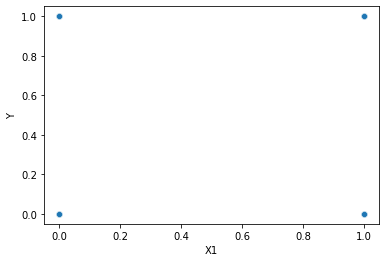

In [14]:
tempt = train[train["Provinsi"]==11]
sns.scatterplot(x="X1",y="Y",data=train)

In [15]:
for i in train:
    print(train[i].unique())

[    1     2     4 ... 19527 19529 19530]
[11 12 13 14 15 16 17 18 19 21 31 32 33 34 35 36 51 52 53 61 62 63 64 65
 71 72 73 74 75 76 81 82 91 94]
[1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113 1114
 1115 1116 1117 1118 1171 1172 1173 1174 1175 1201 1202 1203 1204 1205
 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219
 1220 1221 1222 1223 1224 1225 1271 1272 1273 1274 1275 1276 1277 1278
 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1371 1372
 1373 1374 1375 1376 1377 1401 1402 1403 1404 1405 1406 1407 1408 1409
 1410 1471 1473 1501 1502 1503 1504 1505 1506 1507 1508 1509 1571 1572
 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1671
 1672 1673 1674 1701 1702 1703 1704 1705 1706 1707 1708 1709 1771 1801
 1802 1803 1804 1805 1806 1807 1808 1809 1810 1811 1812 1813 1871 1872
 1901 1902 1903 1904 1905 1906 1971 2101 2102 2103 2104 2105 2171 2172
 3101 3171 3172 3173 3174 3175 3201 3202 3203 3204 3205 3206 3207 3208
 

In [16]:
train

,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,1,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
1,2,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
2,4,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
3,7,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869
4,8,11,1101,0,1,36,1,0,0,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,19524,94,9471,1,0,28,1,0,1,1,1.757,3.262,48.936,209.045
13622,19526,94,9471,0,1,22,1,1,1,1,1.757,3.262,48.936,209.045
13623,19527,94,9471,0,0,35,1,0,1,1,1.757,3.262,48.936,209.045
13624,19529,94,9471,0,0,27,1,0,1,1,1.757,3.262,48.936,209.045


<AxesSubplot:>

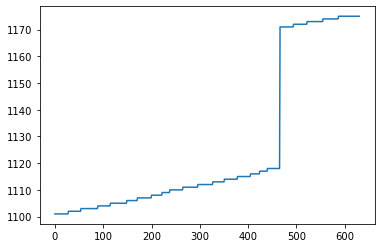

In [17]:
train[train['Provinsi']==11]["KodeKabKot"].plot()

In [18]:
tempt = train[train["KodeKabKot"]==9]
tempt.KodeKabKot.value_counts()

Series([], Name: KodeKabKot, dtype: int64)

<AxesSubplot:>

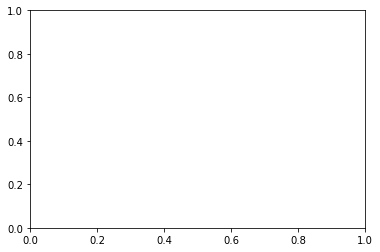

In [19]:
sns.scatterplot(x= 'Z1',data=tempt,y="KodeKabKot",hue="Y")

<AxesSubplot:>

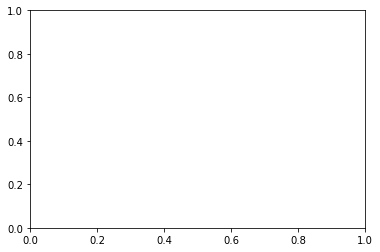

In [20]:
sns.scatterplot(x= 'Z2',data=tempt,y="KodeKabKot",hue="Y")

<AxesSubplot:>

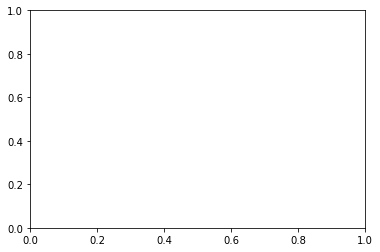

In [21]:
sns.scatterplot(x= 'Z3',data=tempt,y="KodeKabKot",hue="Y")

<AxesSubplot:>

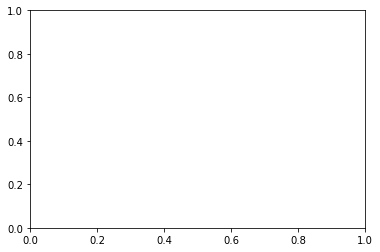

In [22]:
sns.scatterplot(x= 'Z4',data=tempt,y="Provinsi",hue="Y")

In [23]:
test

,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,17,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5901,19515,94,9471,1,39,0,1,1,1,1.757,3.262,48.936,209.045
5902,19525,94,9471,0,30,1,1,1,1,1.757,3.262,48.936,209.045
5903,19528,94,9471,0,22,1,1,1,1,1.757,3.262,48.936,209.045
5904,19531,94,9471,0,40,1,1,1,1,1.757,3.262,48.936,209.045


In [24]:
train.KodeKabKot.value_counts()

7306    61
3329    53
9106    50
3603    49
3211    49
        ..
3471     6
9433     5
9434     5
9435     5
9430     1
Name: KodeKabKot, Length: 514, dtype: int64